<a href="https://colab.research.google.com/github/Mathias2204/Data_Science_MK/blob/main/02_Intro_Pandas_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pandas and Numpy


Python has several built-in types of data structures such as lists and dictionaries, but none of them allows you to efficiently do computations on large lists or tables of data. The Numpy and Pandas libraries fill this gap by providing 1) specific data structures on which one can efficiently compute and 2) functions to perform the computations on these structures.

Numpy is the core scientific computing library on which virtually all other scientific Python packages are building (except for deep learning libraries). This includes notably Scipy, a package offering numerical routines for optimization, regression etc. that will be used in the last series of lectures.

Pandas, which itself builds on top of Numpy, is the core data science library on which higher level libraries (e.g. for plotting) are building. 

Here we briefly present the main data structure offered by Pandas, the **DataFrame** and then show how the data in DataFrames are actually **arrays**, the main data structure of Numpy. This allows us in the next notebooks to explore Numpy before coming back at the end of the course to Pandas.

Let's first import both Pandas and Numpy. Both have very commonly used abbreviations ```np``` and ```pd``` that you should use as well to simplify your life. Note that most sub-modules are directly accessible and you won't have to import specific ones as migth be the case for other libraries.

In [ ]:
import pandas as pd
import numpy as np

## Importing data

Just like any other library, Pandas offers functionality through the *dot-notation* (as e.g. in ```math.cos()```). When surveying usage of Pandas in places like GitHub, it turns out that the most used function is the one allowing one to import a CSV (comma-separated values). Indeed while we could import tabular data with the ```read``` function, this becomes quickly cumbersome for complex data and Pandas takes care of all details for us. 


### read_*** functions

As an example we import here the file available [here](https://github.com/KingaS03/Introduction-to-Python/blob/master/Homework/country_vaccinations.xls). If we look at the file we see that even though it has an .xls extension, it is in fact just a CSV file. Pandas has many importing functions and we use here ```read_csv```. You can see the list of all available importers by typing ```pd.read_``` and seeing options from autocomplete.

We can either download the file and indicate the file path or directly *read* it from the web (*Note that on GitHub you need to use the [raw](https://raw.githubusercontent.com/KingaS03/Introduction-to-Python/master/Homework/country_vaccinations.xls) version of the file to download it*)

```
url = 'https://raw.githubusercontent.com/KingaS03/Introduction-to-Python/master/Homework/country_vaccinations.xls'
vaccine = pd.read_csv(url)
```

Let's first see what this object is:

```
type(vaccine)
```

We see that we are dealing with a DataFrame, the two-dimensional data structure offered by Pandas. If we just execute a cell with that variable we can display the first lines:

```
vaccine
```

We see that we are dealing with tabular data of various types: we have text (e.g. countries), dates and numbers. Just like in a tabular sheet, each column has a label and each line has an index (column in bold on the left), so that every element can be located with these *coordinates*.

## Methods attached to dataframes

We have seen before that every variable in Python has a series of functions attached to it (methods). For example if we have a text variable (string) we can e.g. split it at a given place:

```
my_string = 'This is a sentence with spaces.'
my_string.split(' ')
```

The same logic applies to Pandas DataFrames and in general to any new variable that is created by a given package: they all come with a series of methods attached to them.

For example if we only want to display the fist 5 lines of the DataFrame, we can use the ```head``` method:

vaccine.head(5)

We will learn later how to extract statistics, but just as an example of functions that exsit, you can for example get a basic statistical description of a DataFrame using the ```describe``` method:

vaccine.describe()

We see that in this particular case, the returned object is a DataFrame as well!

## Accessing columns

If we want to work with only a given column from a dataframe, we can extract it. Just like when we want to extract an element from a regular list, e.g. ```my_list[3]```, for Pandas we also use the square parenthesis (brackets) but this time with the name of the column:

```
some_column = vaccine['daily_vaccinations']
some_column
```

As we have a single columns here, we are not dealing with a DataFrame anymore but with a Series:

type(some_column)

We won't explore much the Series object on its own in this course, but know that you can for example create a DataFrame from scratch by combining multiple Series.

## What is underlying Pandas

We see above that ```some_column``` is composed of and index (0, 1, 2 etc) and the corresponding values (NaN, 64.0, 64.0 etc.). If we want to do mathematics with those values, we don't really need the index and a list of numbers would be sufficient. We can obtain such a list by asking for the ```values``` of the series:

```actual_values = some_column.values
actual_values
```

We see that the output is not just a simple Python list. It is in fact called an ```array```. If we ask for the type of this object, we get:

type(actual_values)

The lists of values contained in Pandas DataFrame are in fact Numpy arrays. A 
large part of the computing logic in Pandas is inspired from Numpy, therefore we now make a detour to Numpy before coming back to DataFrames.

# Exercise


1. In the Data folder on Ilias there is the data file CCD-Data.txt. Upload this file to a folder on your google drive. If you don't have a google account, make it now. Look at the file by clicking on it. Try to make sense of the data with the help of the metadata file also in the Ilias folder. 

2. Mount the file to this your notebook (example code below). The path and the file name must match the ones on your google drive, of course.


In [8]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/CCD-Data.txt' # To be adapted

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3. Try to understand based on the API description (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and find out how to read the data into a DataFrame without the header information. Hint: Use the header argument.

In [9]:
import pandas as pd
df = pd.read_csv(path, delimiter='\t', header = 13)
df.head()

,Unnamed: 0,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
0,2018-10-25 10:32:04.789000,1540456324789,0.329672,0.329672,0.329672,0.090294,-0.716926,-1.829304,-0.686330,-0.428776,...,-0.038483,-0.039623,-0.036920,-0.037309,-0.037299,-0.037476,-0.036856,-0.036853,-0.039100,-0.035545
1,2018-10-25 10:32:04.878000,1540456324878,-0.044412,-0.044412,-0.044412,0.157632,-0.672423,-2.183981,-0.492421,-0.000000,...,-0.039428,-0.038486,-0.037309,-0.036357,-0.037289,-0.038728,-0.037214,-0.036902,-0.040210,-0.038165
2,2018-10-25 10:32:04.962000,1540456324962,0.338219,0.338219,0.338219,0.330993,-0.879836,-0.000000,-0.559845,-0.000000,...,-0.037725,-0.037534,-0.036560,-0.036152,-0.036554,-0.036875,-0.037351,-0.036746,-0.038686,-0.036903
3,2018-10-25 10:32:05.046000,1540456325046,-0.049682,-0.049682,-0.049682,0.519086,-0.681150,-0.000000,-0.417230,-0.000000,...,-0.037613,-0.037168,-0.036369,-0.034549,-0.036252,-0.037948,-0.036713,-0.035706,-0.038203,-0.036822
4,2018-10-25 10:32:05.129000,1540456325129,0.335086,0.335086,0.335086,-0.041393,-0.000000,-1.802774,-0.510417,-0.000000,...,-0.040919,-0.038288,-0.035840,-0.035638,-0.039504,-0.040093,-0.039953,-0.037656,-0.038082,-0.035900


4. Study this dataset a bit with df.info() and df.describe() methods. How big is the dataset: How many rows, how many columns, how much space in the memory? 

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Columns: 3650 entries, Unnamed: 0 to 780.0381
dtypes: float64(3648), int64(1), object(1)
memory usage: 9.9+ MB


,Unnamed: 1,316.6137,316.7492,316.8847,317.0203,317.1558,317.2913,317.4268,317.5623,317.6977,...,778.9703,779.089,779.2076,779.3263,779.4449,779.5636,779.6822,779.8008,779.9194,780.0381
count,3.550000e+02,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,...,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,1.540456e+12,0.409207,0.409207,0.409207,0.120755,-0.332947,-1.138412,-0.273126,0.036164,-0.026767,...,-0.037705,-0.037621,-0.036954,-0.035224,-0.037010,-0.036702,-0.037107,-0.036634,-0.037724,-0.035371
std,8.676718e+03,0.327439,0.327439,0.327439,0.225739,0.368498,0.926140,0.318666,0.331674,0.756225,...,0.001611,0.001573,0.001648,0.001574,0.001522,0.001571,0.001649,0.001624,0.001545,0.001536
min,1.540456e+12,-0.243277,-0.243277,-0.243277,-0.504316,-0.879836,-2.446382,-0.772345,-0.629352,-0.809866,...,-0.041032,-0.040494,-0.039786,-0.039203,-0.040537,-0.040524,-0.040304,-0.039905,-0.040929,-0.038231
25%,1.540456e+12,0.103420,0.103420,0.103420,-0.016814,-0.600144,-1.975407,-0.483988,-0.005090,-0.200815,...,-0.038473,-0.038412,-0.037876,-0.036055,-0.037728,-0.037505,-0.037930,-0.037541,-0.038611,-0.036165
50%,1.540456e+12,0.330891,0.330891,0.330891,0.076447,-0.424603,-1.462398,-0.339107,0.000000,0.000000,...,-0.037737,-0.037731,-0.036998,-0.035267,-0.037119,-0.036722,-0.037191,-0.036708,-0.037786,-0.035425
75%,1.540456e+12,0.844202,0.844202,0.844202,0.212742,-0.124390,-0.000000,-0.114209,0.016706,-0.000000,...,-0.037022,-0.036934,-0.036270,-0.034529,-0.036315,-0.035969,-0.036296,-0.035855,-0.036984,-0.034661
max,1.540456e+12,0.871232,0.871232,0.871232,2.056905,1.344611,0.301030,1.797614,2.025306,12.746800,...,-0.016370,-0.016801,-0.014841,-0.014077,-0.017539,-0.015907,-0.016059,-0.015445,-0.016981,-0.014757


5. Plot some columns.

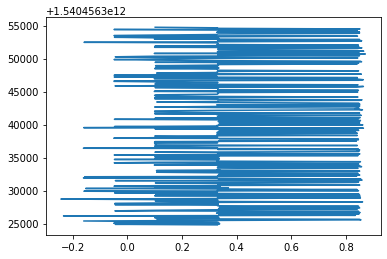

In [23]:
import matplotlib.pyplot as plt
x = df['316.6137']
y = df['Unnamed: 1']

plt.plot(x,y)
plt.show()

After finishing the exercise fill this one question [form](https://docs.google.com/forms/d/e/1FAIpQLSc1U9FGUqwizHwXZSf1dtGHwaGqyxjQuRxnhHYFPy1VUtrL4g/viewform?usp=sf_link) (mandatory) !